# Carregando matriz binária de dados de ransomwares de uma pasta na entrada do modelo

In [ ]:
'''
import os
import numpy as np
import pandas as pd
import tensorflow as tf

# Caminho para a pasta com os arquivos CSV
caminho_pasta = "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/VirusShare_84"

# Configurar limite de memória para evitar travamentos
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Habilita o uso dinâmico de memória
    except RuntimeError as e:
        print(e)

# Lista de arquivos CSV
arquivos_csv = [os.path.join(caminho_pasta, arquivo) for arquivo in os.listdir(caminho_pasta) if arquivo.endswith(".csv")]

# Função para carregar um único arquivo CSV e preprocessar
def carregar_csv(caminho_arquivo):
    df = pd.read_csv(caminho_arquivo, header=None)
    matriz = df.to_numpy(dtype=np.int32)  # Converte para numpy array com tipo int32
    matriz = np.expand_dims(matriz, axis=-1)  # Adiciona a dimensão do canal
    return matriz

# Carrega todas as matrizes e aplica o preprocessamento
matrizes = [carregar_csv(arquivo) for arquivo in arquivos_csv]

# Verifica a forma dos dados
print(f"Número de matrizes carregadas: {len(matrizes)}")
print(f"Forma da primeira matriz: {matrizes[0].shape}")  # Deve ser (84, 84, 1)

# Converte as matrizes para tensor
entradas_modelo = tf.convert_to_tensor(matrizes, dtype=tf.float32)

# Criando os rótulos (ajuste se as classes não forem igualmente divididas)
labels = [0] * (6263)# // 2) + [1] * ((6263 // 2)+1)  # Ajuste conforme a divisão real de classes

# Cria o dataset combinando entradas e rótulos
dataset = tf.data.Dataset.from_tensor_slices((entradas_modelo, labels))

# Define tamanho do lote
dataset = dataset.batch(32)
'''

Número de matrizes carregadas: 6263
Forma da primeira matriz: (84, 84, 1)


In [ ]:
'''
# Modelo simplificado de CNN com Input explícito
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(84, 84, 1)),  # Define a entrada explicitamente
    tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), strides=3, activation='sigmoid'),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])

# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinamento
modelo.fit(dataset, epochs=10) '''


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.1764
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0248
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0113
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0067
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0045
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0032
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0024
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0019
Epoch 9/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0015
Epoch 10/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0012


# Importing libraries

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from aux_module import prepare_input

# Setting gpu

In [3]:
# Configurar limite de memória
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Expandindo para mais pastas e incluir amostras benignas

In [4]:
# Caminho para as pastas com os arquivos CSV
input_folders = {
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/VirusShare_14": 1,  # Malware samples
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/ISOT_14": 1,       # Malware samples
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/Sorel_14": 1,      # Malware samples
    # "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/testingmain_14/Malign/newDataset": 1,      # NEW malware samples
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Benign_14": 0             # Benign samples
}
'''
# Função para carregar e preprocessar os arquivos CSV
def carregar_csv(caminho_arquivo):
    df = pd.read_csv(caminho_arquivo, header=None)
    matriz = df.to_numpy(dtype=np.float32)
    matriz = np.expand_dims(matriz, axis=-1)  # Adiciona a dimensão do canal
    return matriz

# Carrega matrizes e rótulos
matrizes, labels, arquivos = [], [], []
for caminho_pasta, rotulo in caminhos_pastas.items():
    arquivos_csv = [os.path.join(caminho_pasta, arquivo) for arquivo in os.listdir(caminho_pasta) if (arquivo.endswith(".csv"))]
    for arquivo in arquivos_csv:
        matrizes.append(carregar_csv(arquivo))
        labels.append(rotulo)
        arquivos.append(arquivo)

# Divide os dados em treino e teste
matrizes_train, matrizes_test, labels_train, labels_test, arquivos_train, arquivos_test = train_test_split(
    matrizes, labels, arquivos, test_size=0.1, random_state=42, stratify=labels
)

# Converte os conjuntos de treino e teste para tensores
entradas_train = tf.convert_to_tensor(np.array(matrizes_train), dtype=tf.float32)
labels_train = tf.convert_to_tensor(np.array(labels_train), dtype=tf.int32)
entradas_test = tf.convert_to_tensor(np.array(matrizes_test), dtype=tf.float32)
labels_test = tf.convert_to_tensor(np.array(labels_test), dtype=tf.int32)
'''

entradas_train, labels_train, entradas_test, labels_test = prepare_input(input_folders)

# Cria os datasets de treino e teste
dataset_train = tf.data.Dataset.from_tensor_slices((entradas_train, labels_train)).shuffle(len(labels_train)).batch(32)
dataset_test = tf.data.Dataset.from_tensor_slices((entradas_test, labels_test)).batch(32)

2025-05-14 14:04:29.031891: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.


Metal device set to: Apple M3

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2025-05-14 14:04:29.032415: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Alguns testes

In [ ]:
#97,69
# Modelo simplificado de CNN
modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(84, 84, 1)),
    #tf.keras.layers.Input(shape=(98, 84, 1)),
    tf.keras.layers.Input(shape=(522, 14, 1)),
    #tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (28, 28), strides=14, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (14, 14), strides=7, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),#2),  # Dropout com taxa de 20%
    #tf.keras.layers.Conv2D(32, (3, 2), strides=1, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.001),  # Dropout com taxa de 0.1%
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])
# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#97,76
# Modelo simplificado de CNN
modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(84, 84, 1)),
    #tf.keras.layers.Input(shape=(98, 84, 1)),
    tf.keras.layers.Input(shape=(522, 14, 1)),
    #tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (28, 28), strides=14, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (14, 14), strides=7, activation='sigmoid'),
    tf.keras.layers.Dropout(0.3),#2),  # Dropout com taxa de 20%
    #tf.keras.layers.Conv2D(32, (3, 2), strides=1, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.001),  # Dropout com taxa de 0.1%
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])
# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Overfitting analysis

In [12]:
#98,13 - overfitting analysis copy after elevating batch from 32 to 256 (before it was 97,72)
# Modelo simplificado de CNN
modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(84, 84, 1)),
    #tf.keras.layers.Input(shape=(98, 84, 1)),
    tf.keras.layers.Input(shape=(522, 14, 1)),
    #tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (28, 28), strides=14, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (14, 14), strides=7, activation='sigmoid'),
    tf.keras.layers.Dropout(0.31),#2),  # Dropout com taxa de 20%
    #tf.keras.layers.Conv2D(32, (3, 2), strides=1, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.01),  # Dropout com taxa de 0.1%
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])
# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(min_delta=0.001, monitor='loss', patience=20, restore_best_weights=True)
history=modelo.fit(entradas_train,labels_train,epochs=200, callbacks=[callback],batch_size=256,verbose=0,validation_split=0.12)#(dataset_train,epochs=200, callbacks=[callback],batch_size=32,verbose=0,validation_split=0.12)
#modelo.fit(dataset_train,epochs=28, callbacks=[callback])

In [24]:
import matplotlib
import pandas as pd
from IPython.display import display

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 0.06250296533107758


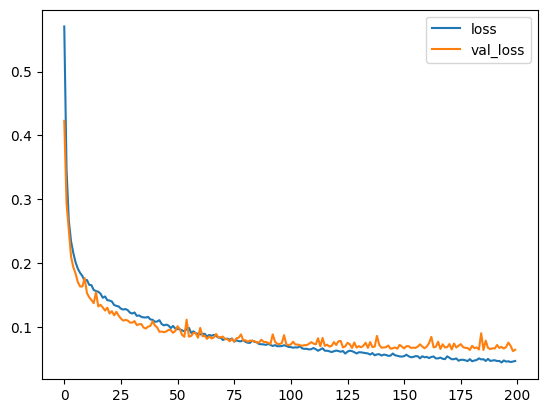

In [8]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 0.059633754193782806


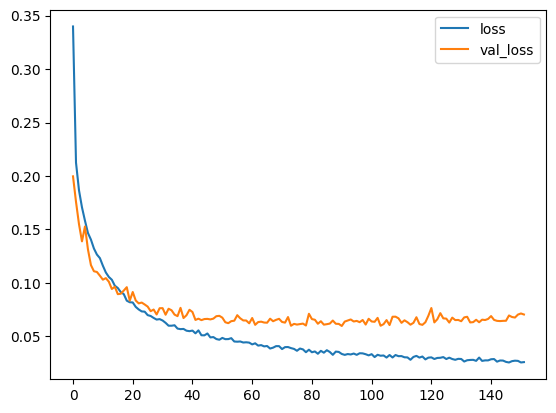

In [25]:
history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss','val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [7]:
modelo.evaluate(entradas_test,labels_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0586


[0.07058443874120712, 0.9784625768661499]

### Melhor teste

In [ ]:
#97,78
# Modelo simplificado de CNN
modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(84, 84, 1)),
    #tf.keras.layers.Input(shape=(98, 84, 1)),
    tf.keras.layers.Input(shape=(522, 14, 1)),
    #tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (28, 28), strides=14, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (14, 14), strides=7, activation='sigmoid'),
    tf.keras.layers.Dropout(0.31),#2),  # Dropout com taxa de 20%
    #tf.keras.layers.Conv2D(32, (3, 2), strides=1, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.01),  # Dropout com taxa de 0.1%
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])
# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Modelo simplificado de CNN
modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(84, 84, 1)),
    #tf.keras.layers.Input(shape=(98, 84, 1)),
    tf.keras.layers.Input(shape=(522, 14, 1)),
    #tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (28, 28), strides=14, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (14, 14), strides=7, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.31),#2),  # Dropout com taxa de 20%
    #tf.keras.layers.Conv2D(32, (3, 2), strides=1, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (1,1), strides=1, activation='sigmoid'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.01),  # Dropout com taxa de 0.1%
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    #tf.keras.layers.Dropout(0.01),  # Dropout com taxa de 0.1%
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.MaxPooling2D((1, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])
# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
#modelo.summary()

In [37]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
modelo.fit(dataset_train,epochs=200, callbacks=[callback])
#modelo.fit(dataset_train,epochs=28, callbacks=[callback])

Epoch 1/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7607 - loss: 0.4701
Epoch 2/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9097 - loss: 0.2249
Epoch 3/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9204 - loss: 0.1963
Epoch 4/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9279 - loss: 0.1754
Epoch 5/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9346 - loss: 0.1619
Epoch 6/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9415 - loss: 0.1470
Epoch 7/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9448 - loss: 0.1383
Epoch 8/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9463 - loss: 0.1301
Epoch 9/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9486 - loss: 0.1262
Epoch 10/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9557 - loss: 0.1144
Epoch 11/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9589 - loss: 0.1073
Epoch 12/200
755/755 ━━━━━━━━━━━━━━━━━━━━

In [38]:
modelo.evaluate(dataset_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0786


[0.0818554237484932, 0.9759734869003296]

In [82]:
# Salvar o modelo no formato HDF5
modelo.save('modelo_14_09778.h5')
#modelo=tf.keras.models.load_model('modelo_097332_009579.h5')


 /usr/bin/python3 /Users/joaopaulopmaues/.vscode/extensions/ms-python.python-2024.8.1/python_files/printEnvVariablesToFile.py /Users/joaopaulopmaues/.vscode/extensions/ms-python.python-2024.8.1/python_files/deactivate/zsh/envVars.txt
conda activate /Users/joaopaulopmaues/Downloads/tensorflow-test/env
 conda install -c apple tensorflow-deps
python -m pip install tensorflow-macos
python -m pip install tensorflow-metal

Triage API Key 9d13b781fa843f8811e8a4c0776750b1e351937b

#searching for sample-id using sha256

triage search tag:search-string

ex: triage search sha256:88ee23d0001b325653602351eb898af0ab82a7f8c2413d1f44fea7557c46eabb

In [13]:
#97,72
# Modelo simplificado de CNN
modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(84, 84, 1)),
    #tf.keras.layers.Input(shape=(98, 84, 1)),
    #tf.keras.layers.Input(shape=(542, 14, 1)),
    tf.keras.layers.Input(shape=(696, 14, 1)),
    #tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (28, 28), strides=14, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (14, 14), strides=7, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),#2),  # Dropout com taxa de 20%
    #tf.keras.layers.Conv2D(32, (3, 2), strides=1, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (3, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.001),  # Dropout com taxa de 0.1%
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPooling2D((2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])
# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#modelo.fit(dataset_train,epochs=200, callbacks=[callback])
modelo.fit(dataset_train,epochs=200, callbacks=[callback])

Epoch 1/200


2025-02-22 22:27:29.085375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7344 - loss: 0.4846
Epoch 2/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9107 - loss: 0.2253
Epoch 3/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9247 - loss: 0.1836
Epoch 4/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9338 - loss: 0.1630
Epoch 5/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9419 - loss: 0.1493
Epoch 6/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9446 - loss: 0.1385
Epoch 7/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9467 - loss: 0.1310
Epoch 8/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9514 - loss: 0.1219
Epoch 9/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9571 - loss: 0.1092
Epoch 10/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9575 - loss: 0.1099
Epoch 11/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9615 - loss: 0.1029
Epoch 12/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step

In [15]:
modelo.evaluate(dataset_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9785 - loss: 0.0691


[0.07608535140752792, 0.9771333932876587]

In [33]:
# Salvar o modelo no formato HDF5
modelo.save('modelo_14_09772.h5')
#modelo=tf.keras.models.load_model('modelo_097332_009579.h5')

# Ajustando novo tamanho de paddings no csv

In [7]:
import os
import pandas as pd
import numpy as np

# Diretórios de entrada e saída
input_folder = "samples/Malign/Sorel_14"
output_folder = "samples/Malign/Sorel_542"
os.makedirs(output_folder, exist_ok=True)

# Função para expandir as linhas de -1
def expand_separator_rows(file_path, output_path, padding_value=-1, num_insertions=10):
    # Carregar o CSV
    df = pd.read_csv(file_path, header=None)

    # Criar uma lista para armazenar as novas linhas
    new_rows = []

    # Percorrer as linhas e expandir quando encontrar a linha de padding
    for _, row in df.iterrows():
        new_rows.append(row.values)
        if np.all(row.values == padding_value):
            # Insere 10 linhas extras de padding após cada linha de -1
            for _ in range(num_insertions):
                new_rows.append(np.full(df.shape[1], padding_value))

    # Criar um novo DataFrame com as linhas expandidas
    expanded_df = pd.DataFrame(new_rows)

    # Salvar o novo CSV
    expanded_df.to_csv(output_path, index=False, header=False)
    print(f"Arquivo processado: {output_path} ({expanded_df.shape[0]} linhas)")

# Processar todos os arquivos no diretório de entrada
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        expand_separator_rows(input_path, output_path)

print("Processamento concluído!")

Arquivo processado: samples/Malign/Sorel_542/Sample_6802.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_8191.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_4973.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_864.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_4967.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_870.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_8185.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_6816.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_79.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_1189.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_51.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_2480.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542/Sample_3946.csv (542 linhas)
Arquivo processado: samples/Malign/Sorel_542

In [8]:
import os
import pandas as pd
import numpy as np

# Diretórios de entrada e saída
input_folder = "samples/Malign/ISOT_14"
output_folder = "samples/Malign/ISOT_542"
os.makedirs(output_folder, exist_ok=True)

# Função para expandir as linhas de -1
def expand_separator_rows(file_path, output_path, padding_value=-1, num_insertions=10):
    # Carregar o CSV
    df = pd.read_csv(file_path, header=None)

    # Criar uma lista para armazenar as novas linhas
    new_rows = []

    # Percorrer as linhas e expandir quando encontrar a linha de padding
    for _, row in df.iterrows():
        new_rows.append(row.values)
        if np.all(row.values == padding_value):
            # Insere 10 linhas extras de padding após cada linha de -1
            for _ in range(num_insertions):
                new_rows.append(np.full(df.shape[1], padding_value))

    # Criar um novo DataFrame com as linhas expandidas
    expanded_df = pd.DataFrame(new_rows)

    # Salvar o novo CSV
    expanded_df.to_csv(output_path, index=False, header=False)
    print(f"Arquivo processado: {output_path} ({expanded_df.shape[0]} linhas)")

# Processar todos os arquivos no diretório de entrada
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        expand_separator_rows(input_path, output_path)

print("Processamento concluído!")

Arquivo processado: samples/Malign/ISOT_542/Sample_79.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_51.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_45.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_119.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_125.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_92.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_643.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_657.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_131.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_86.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_482.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_496.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_469.csv (542 linhas)
Arquivo processado: samples/Malign/ISOT_542/Sample_441.csv (542 linha

In [ ]:
import os
import pandas as pd
import numpy as np

# Diretórios de entrada e saída
input_folder = "samples/Benign_14"
output_folder = "samples/Benign_542"
os.makedirs(output_folder, exist_ok=True)

# Função para expandir as linhas de -1
def expand_separator_rows(file_path, output_path, padding_value=-1, num_insertions=10):
    # Carregar o CSV
    df = pd.read_csv(file_path, header=None)

    # Criar uma lista para armazenar as novas linhas
    new_rows = []

    # Percorrer as linhas e expandir quando encontrar a linha de padding
    for _, row in df.iterrows():
        new_rows.append(row.values)
        if np.all(row.values == padding_value):
            # Insere 10 linhas extras de padding após cada linha de -1
            for _ in range(num_insertions):
                new_rows.append(np.full(df.shape[1], padding_value))

    # Criar um novo DataFrame com as linhas expandidas
    expanded_df = pd.DataFrame(new_rows)

    # Salvar o novo CSV
    expanded_df.to_csv(output_path, index=False, header=False)
    print(f"Arquivo processado: {output_path} ({expanded_df.shape[0]} linhas)")

# Processar todos os arquivos no diretório de entrada
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        expand_separator_rows(input_path, output_path)

print("Processamento concluído!")

Arquivo processado: samples/Benign_542/Sample_12878.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_6802.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_8191.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_4973.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_864.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_10909.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_4967.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_870.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_8185.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_6816.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_79.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_13582.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_12844.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_1189.csv (542 linhas)
Arquivo processado: samples/Benign_542/Sample_88

In [8]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Caminho para as pastas com os arquivos CSV
caminhos_pastas = {
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/VirusShare_556": 1,  # Amostras malignas
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/ISOT_556": 1,       # Amostras malignas
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/Sorel_556": 1,      # Amostras malignas
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Benign_556": 0             # Amostras benignas
}

# Configurar limite de memória
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Função para carregar e preprocessar os arquivos CSV
def carregar_csv(caminho_arquivo):
    df = pd.read_csv(caminho_arquivo, header=None)
    matriz = df.to_numpy(dtype=np.float32)
    matriz = np.expand_dims(matriz, axis=-1)  # Adiciona a dimensão do canal
    return matriz

# Carrega matrizes e rótulos
matrizes, labels, arquivos = [], [], []
for caminho_pasta, rotulo in caminhos_pastas.items():
    arquivos_csv = [os.path.join(caminho_pasta, arquivo) for arquivo in os.listdir(caminho_pasta) if (arquivo.endswith(".csv"))]
    for arquivo in arquivos_csv:
        matrizes.append(carregar_csv(arquivo))
        labels.append(rotulo)
        arquivos.append(arquivo)

# Divide os dados em treino e teste
matrizes_train, matrizes_test, labels_train, labels_test, arquivos_train, arquivos_test = train_test_split(
    matrizes, labels, arquivos, test_size=0.2, random_state=42, stratify=labels
)

# Converte os conjuntos de treino e teste para tensores
entradas_train = tf.convert_to_tensor(np.array(matrizes_train), dtype=tf.float32)
labels_train = tf.convert_to_tensor(np.array(labels_train), dtype=tf.int32)
entradas_test = tf.convert_to_tensor(np.array(matrizes_test), dtype=tf.float32)
labels_test = tf.convert_to_tensor(np.array(labels_test), dtype=tf.int32)
# Cria os datasets de treino e teste
dataset_train = tf.data.Dataset.from_tensor_slices((entradas_train, labels_train)).shuffle(len(labels_train)).batch(32)
dataset_test = tf.data.Dataset.from_tensor_slices((entradas_test, labels_test)).batch(32)

2025-02-22 17:03:05.955517: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-22 17:03:05.955575: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M3

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [1]:
import os
import pandas as pd
import numpy as np

# Função para expandir as linhas de -1
def expand_separator_rows(file_path, output_path, padding_value=-1, num_insertions=10):
    # Carregar o CSV
    df = pd.read_csv(file_path, header=None)

    # Criar uma lista para armazenar as novas linhas
    new_rows = []

    # Percorrer as linhas e expandir quando encontrar a linha de padding
    for _, row in df.iterrows():
        new_rows.append(row.values)
        if np.all(row.values == padding_value):
            # Insere 10 linhas extras de padding após cada linha de -1
            for _ in range(num_insertions):
                new_rows.append(np.full(df.shape[1], padding_value))

    # Criar um novo DataFrame com as linhas expandidas
    expanded_df = pd.DataFrame(new_rows)

    # Salvar o novo CSV
    expanded_df.to_csv(output_path, index=False, header=False)
    print(f"Arquivo processado: {output_path} ({expanded_df.shape[0]} linhas)")

In [2]:

# Diretórios de entrada e saída
input_folder = "samples/Malign/ISOT_542"
output_folder = "samples/Malign/ISOT_556"
os.makedirs(output_folder, exist_ok=True)

# Processar todos os arquivos no diretório de entrada
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        expand_separator_rows(input_path, output_path,num_insertions=7)

print("Processamento concluído!")

Arquivo processado: samples/Malign/ISOT_556/Sample_79.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_51.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_45.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_119.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_125.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_92.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_643.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_657.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_131.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_86.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_482.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_496.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_469.csv (696 linhas)
Arquivo processado: samples/Malign/ISOT_556/Sample_441.csv (696 linha

In [3]:
# Diretórios de entrada e saída
input_folder = "samples/Malign/Sorel_542"
output_folder = "samples/Malign/Sorel_556"
os.makedirs(output_folder, exist_ok=True)
# Processar todos os arquivos no diretório de entrada
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        expand_separator_rows(input_path, output_path,num_insertions=7)

print("Processamento concluído!")

Arquivo processado: samples/Malign/Sorel_556/Sample_6802.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_8191.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_4973.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_864.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_4967.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_870.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_8185.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_6816.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_79.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_1189.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_51.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_2480.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556/Sample_3946.csv (696 linhas)
Arquivo processado: samples/Malign/Sorel_556

In [5]:
# Diretórios de entrada e saída
input_folder = "samples/Malign/VirusShare_542"
output_folder = "samples/Malign/VirusShare_556"
os.makedirs(output_folder, exist_ok=True)
# Processar todos os arquivos no diretório de entrada
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        expand_separator_rows(input_path, output_path,num_insertions=7)

print("Processamento concluído!")

Arquivo processado: samples/Malign/VirusShare_556/Sample_4973.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_864.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_4967.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_870.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_79.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_1189.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_51.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_2480.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_3946.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_5489.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_858.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_680.csv (696 linhas)
Arquivo processado: samples/Malign/VirusShare_556/Sample_479

In [7]:
# Diretórios de entrada e saída
input_folder = "samples/Benign_542"
output_folder = "samples/Benign_556"
os.makedirs(output_folder, exist_ok=True)
# Processar todos os arquivos no diretório de entrada
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)
        expand_separator_rows(input_path, output_path,num_insertions=7)

print("Processamento concluído!")

Arquivo processado: samples/Benign_556/Sample_12878.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_6802.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_8191.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_4973.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_864.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_10909.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_4967.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_870.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_8185.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_6816.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_79.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_13582.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_12844.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_1189.csv (696 linhas)
Arquivo processado: samples/Benign_556/Sample_88

In [18]:
import pandas as pd
import numpy as np
import os

def remove_excess_padding(input_csv, output_csv, max_padding=18):
    """
    Lê um arquivo CSV, identifica regiões com excesso de linhas contendo apenas -1
    e reduz para no máximo `max_padding` linhas por região.
    """
    
    # Carregar CSV
    df = pd.read_csv(input_csv, header=None)
    
    # Converter para numpy para facilitar o processamento
    data = df.values
    
    # Identificar linhas que contêm apenas -1
    is_padding = np.all(data == -1, axis=1)
    
    # Processar remoção do excesso de padding
    result = []
    count = 0  # Contador de linhas consecutivas de padding
    found_first_block = False  # Para rastrear o primeiro bloco de padding
    
    for i in range(len(data)):
        if is_padding[i]:
            if count < max_padding:
                result.append(data[i])
                count += 1
        else:
            # Se encontrou uma linha que não é padding, reinicia o contador
            if count >= max_padding:
                if not found_first_block:
                    found_first_block = True  # Marcamos que encontramos o primeiro bloco
                else:
                    count = 0  # Reseta para detectar o segundo bloco
            result.append(data[i])
    
    # Salvar arquivo corrigido
    pd.DataFrame(result).to_csv(output_csv, index=False, header=False)

# Exemplo de uso

input_array=["samples/Benign_556","samples/Malign/VirusShare_556","samples/Malign/ISOT_556","samples/Malign/Sorel_556"]
output_array=["samples/Benign_c","samples/Malign/VirusShare_c","samples/Malign/ISOT_c","samples/Malign/Sorel_c"]

for i in range(4):
    el1, el2 = input_array[i],output_array[i]
    input_folder = el1
    output_folder = el2
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):
            input_path = os.path.join(input_folder, filename)
            output_path = os.path.join(output_folder, filename)
            remove_excess_padding(input_path, output_path)
            print(f"Corrigido: {filename}")

Corrigido: Sample_12878.csv
Corrigido: Sample_6802.csv
Corrigido: Sample_8191.csv
Corrigido: Sample_4973.csv
Corrigido: Sample_864.csv
Corrigido: Sample_10909.csv
Corrigido: Sample_4967.csv
Corrigido: Sample_870.csv
Corrigido: Sample_8185.csv
Corrigido: Sample_6816.csv
Corrigido: Sample_79.csv
Corrigido: Sample_13582.csv
Corrigido: Sample_12844.csv
Corrigido: Sample_1189.csv
Corrigido: Sample_8813.csv
Corrigido: Sample_11395.csv
Corrigido: Sample_51.csv
Corrigido: Sample_2480.csv
Corrigido: Sample_3946.csv
Corrigido: Sample_5489.csv
Corrigido: Sample_858.csv
Corrigido: Sample_10935.csv
Corrigido: Sample_680.csv
Corrigido: Sample_4797.csv
Corrigido: Sample_1837.csv
Corrigido: Sample_6180.csv
Corrigido: Sample_1823.csv
Corrigido: Sample_6194.csv
Corrigido: Sample_10921.csv
Corrigido: Sample_694.csv
Corrigido: Sample_4783.csv
Corrigido: Sample_11381.csv
Corrigido: Sample_45.csv
Corrigido: Sample_2494.csv
Corrigido: Sample_3952.csv
Corrigido: Sample_13596.csv
Corrigido: Sample_12850.csv
Co

# Novo modelo

In [19]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Caminho para as pastas com os arquivos CSV
caminhos_pastas = {
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/VirusShare_c": 1,  # Amostras malignas
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/ISOT_c": 1,       # Amostras malignas
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Malign/Sorel_c": 1,      # Amostras malignas
    "/Users/joaopaulopmaues/Downloads/tensorflow-test/TCC/XRan/TwoLCNN/samples/Benign_c": 0             # Amostras benignas
}

# Configurar limite de memória
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# Função para carregar e preprocessar os arquivos CSV
def carregar_csv(caminho_arquivo):
    df = pd.read_csv(caminho_arquivo, header=None)
    matriz = df.to_numpy(dtype=np.float32)
    matriz = np.expand_dims(matriz, axis=-1)  # Adiciona a dimensão do canal
    return matriz

# Carrega matrizes e rótulos
matrizes, labels, arquivos = [], [], []
for caminho_pasta, rotulo in caminhos_pastas.items():
    arquivos_csv = [os.path.join(caminho_pasta, arquivo) for arquivo in os.listdir(caminho_pasta) if (arquivo.endswith(".csv"))]
    for arquivo in arquivos_csv:
        matrizes.append(carregar_csv(arquivo))
        labels.append(rotulo)
        arquivos.append(arquivo)

# Divide os dados em treino e teste
matrizes_train, matrizes_test, labels_train, labels_test, arquivos_train, arquivos_test = train_test_split(
    matrizes, labels, arquivos, test_size=0.2, random_state=42, stratify=labels
)

# Converte os conjuntos de treino e teste para tensores
entradas_train = tf.convert_to_tensor(np.array(matrizes_train), dtype=tf.float32)
labels_train = tf.convert_to_tensor(np.array(labels_train), dtype=tf.int32)
entradas_test = tf.convert_to_tensor(np.array(matrizes_test), dtype=tf.float32)
labels_test = tf.convert_to_tensor(np.array(labels_test), dtype=tf.int32)
# Cria os datasets de treino e teste
dataset_train = tf.data.Dataset.from_tensor_slices((entradas_train, labels_train)).shuffle(len(labels_train)).batch(32)
dataset_test = tf.data.Dataset.from_tensor_slices((entradas_test, labels_test)).batch(32)

In [ ]:
#97,80
# Modelo simplificado de CNN
modelo = tf.keras.Sequential([
    #tf.keras.layers.Input(shape=(84, 84, 1)),
    #tf.keras.layers.Input(shape=(98, 84, 1)),
    #tf.keras.layers.Input(shape=(542, 14, 1)),
    tf.keras.layers.Input(shape=(556, 14, 1)),
    #tf.keras.layers.Conv2D(8, (24, 24), strides=12, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (28, 28), strides=14, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (14, 14), strides=7, activation='sigmoid'),
    tf.keras.layers.Dropout(0.2),#2),  # Dropout com taxa de 20%
    #tf.keras.layers.Conv2D(32, (3, 2), strides=1, activation='sigmoid'),
    #tf.keras.layers.Conv2D(32, (1, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Conv2D(32, (3, 1), strides=1, activation='sigmoid'),
    tf.keras.layers.Dropout(0.001),  # Dropout com taxa de 0.1%
    #tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.MaxPooling2D((2, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7),
    tf.keras.layers.LeakyReLU(negative_slope=0.3),
    tf.keras.layers.Dense(2, activation='softmax')  # 2 classes
])
# Compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#modelo.fit(dataset_train,epochs=200, callbacks=[callback])
modelo.fit(dataset_train,epochs=200, callbacks=[callback])

Epoch 1/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7479 - loss: 0.4754
Epoch 2/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9131 - loss: 0.2182
Epoch 3/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9237 - loss: 0.1903
Epoch 4/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9337 - loss: 0.1683
Epoch 5/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 1021s 1s/step - accuracy: 0.9373 - loss: 0.1606
Epoch 6/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9476 - loss: 0.1356
Epoch 7/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9471 - loss: 0.1282
Epoch 8/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 991s 1s/step - accuracy: 0.9536 - loss: 0.1200
Epoch 9/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9548 - loss: 0.1168
Epoch 10/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 1047s 1s/step - accuracy: 0.9575 - loss: 0.1030
Epoch 11/200
755/755 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9625 - loss: 0.0953
Epoch 12/200
755/755 ━━━━━━━━━━━━━━

In [22]:
modelo.evaluate(dataset_test)

189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9780 - loss: 0.0773


[0.08317919075489044, 0.9759734869003296]

In [23]:
# Salvar o modelo no formato HDF5
modelo.save('modelo_556_09780.h5')
#modelo=tf.keras.models.load_model('modelo_097332_009579.h5')